In [8]:
#Q1
import numpy as np
import pandas as pd

#read file
rankings = pd.read_csv('ratings.csv')

#-----------
n_users = rankings.userId.unique().shape[0]
n_items = rankings.movieId.unique().shape[0]
sparsity = round(1.0-len(rankings)/float(n_users*n_items),3)

print("Total number of Users: {}".format(n_users))
print("Total number of Movies: {}".format(n_items))
print("Total number of ratings provided:  {}".format(len(rankings)))
print("Total number ratings provided & not specified: {}".format(n_items*n_users))
print ("Rating Matrix is {}% sparse".format(sparsity*100))
#--------------


Total number of Users: 671
Total number of Movies: 9066
Total number of ratings provided:  100004
Total number ratings provided & not specified: 6083286
Rating Matrix is 98.4% sparse


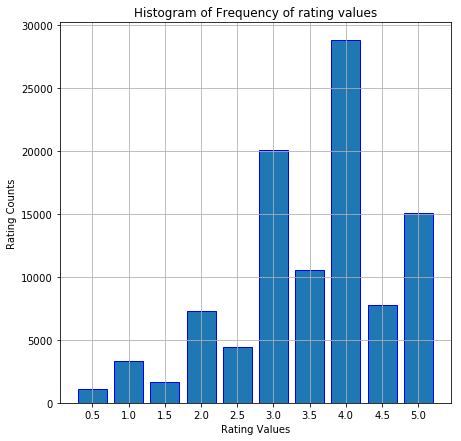

In [10]:
#Q2
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

bin_edges = np.arange(0.25,5.5,0.5)

plt.hist(rankings['rating'],bins = bin_edges,edgecolor="b",rwidth=0.8)
plt.title('Histogram of Frequency of rating values')
plt.xlabel('Rating Values')
plt.ylabel('Rating Counts')
plt.grid('on')

plt.xticks(np.arange(0.5,5.5,0.5))
plt.show()

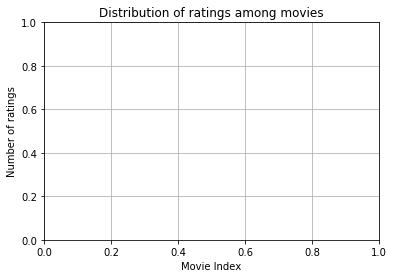

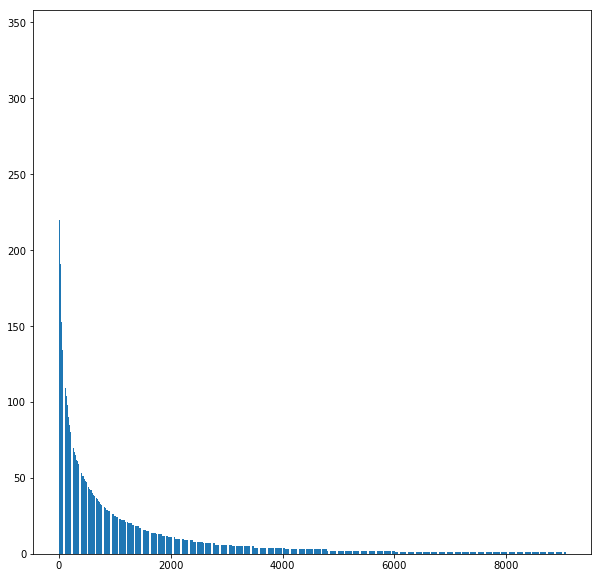

In [15]:
#Q3 - Distribution of ratings among movies

from collections import Counter
plt.title('Distribution of ratings among movies')
plt.xlabel('Movie Index')
plt.ylabel('Number of ratings')
plt.grid('on')
plt.figure(figsize=(10,10))

# Sort movie ratings in decreasing order of ratings
ctr_movieratings = Counter(rankings['movieId'])
#plt.xticks(rankings['movieId'])
plt.bar(np.arange(n_items),sorted(ctr_movieratings.values(),reverse = True))


plt.show()

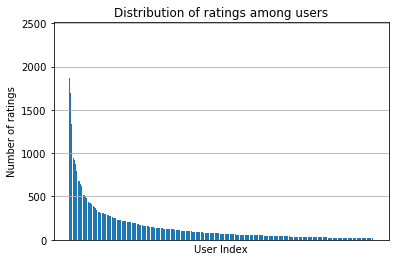

In [16]:
#Q3 -- Distribution of ratings among users

plt.title('Distribution of ratings among users')
plt.xlabel('User Index')
plt.ylabel('Number of ratings')
plt.grid('on')

# Sort user ratings in decreasing order of ratings
ctr_userratings = Counter(rankings['userId'])
plt.xticks([], [])
plt.bar(np.arange(n_users),sorted(ctr_userratings.values(),reverse = True))


plt.show()


In [ ]:
print(ctr_movieratings)

In [20]:
mydata= rankings.pivot(index="movieId", columns="userId", values='rating')
#mydata= rankings.pivot(index="userId", columns='movieId', values='rating')
mydata.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
movieVar = np.array(mydata.var(axis=1))
print("Maximum Movie Varinance is :", max(movieVar))
print("Minimum Movie Varinance is :", min(movieVar))
movieVar = movieVar[~np.isnan(movieVar)]

Maximum Movie Varinance is : 10.125
Minimum Movie Varinance is : 0.0


In [22]:
print(movieVar)

[ 0.9196455   0.77565685  1.32276447 ...,  0.125       0.125       4.5       ]


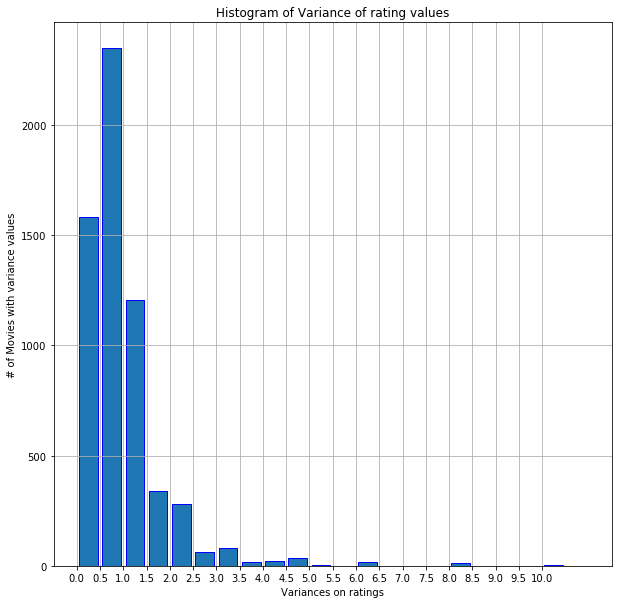

In [23]:
plt.figure(figsize=(10,10))

bin_edges = np.arange(0.0,11.5,0.5)

plt.hist(movieVar,bins = bin_edges,edgecolor="b",rwidth=0.8)
plt.title('Histogram of Variance of rating values')
plt.xlabel('Variances on ratings')
plt.ylabel('# of Movies with variance values')
plt.grid('on')

plt.xticks(np.arange(0.0,10.5,0.5))
plt.show()

In [10]:
print(rankings['rating'])

0         2.5
1         3.0
2         3.0
3         2.0
4         4.0
5         2.0
6         2.0
7         2.0
8         3.5
9         2.0
10        2.5
11        1.0
12        4.0
13        4.0
14        3.0
15        2.0
16        2.0
17        2.5
18        1.0
19        3.0
20        4.0
21        5.0
22        5.0
23        4.0
24        4.0
25        3.0
26        3.0
27        4.0
28        3.0
29        5.0
         ... 
99974     4.5
99975     5.0
99976     3.5
99977     4.0
99978     5.0
99979     5.0
99980     4.5
99981     4.5
99982     5.0
99983     4.0
99984     2.0
99985     2.0
99986     3.0
99987     4.0
99988     4.0
99989     4.5
99990     3.0
99991     4.0
99992     4.0
99993     3.5
99994     5.0
99995     4.0
99996     4.5
99997     4.0
99998     2.5
99999     2.5
100000    4.0
100001    4.0
100002    2.5
100003    3.5
Name: rating, Length: 100004, dtype: float64


In [4]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader

In [25]:
df = pd.DataFrame(rankings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)


<class 'surprise.dataset.DatasetAutoFolds'>


,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
5,1,1263,2.0
6,1,1287,2.0
7,1,1293,2.0
8,1,1339,3.5
9,1,1343,2.0


In [26]:
# We'll use the =KNN With Means algorithm.
Avg_RMSE = []
Avg_MAE = []
# Run 10-fold cross-validation and print results
for k in range(2,102,2):
    print("Attempt number:", k)
    algo = KNNWithMeans(k=k, verbose=False)
    cv = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse_mean =  cv['test_rmse'].mean()
    mae_mean = cv['test_mae'].mean()
    Avg_RMSE.append(rmse_mean) 
    Avg_MAE.append(mae_mean)
    


Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50
Attempt number: 52
Attempt number: 54
Attempt number: 56
Attempt number: 58
Attempt number: 60
Attempt number: 62
Attempt number: 64
Attempt number: 66
Attempt number: 68
Attempt number: 70
Attempt number: 72
Attempt number: 74
Attempt number: 76
Attempt number: 78
Attempt number: 80
Attempt number: 82
Attempt number: 84
Attempt number: 86
Attempt number: 88
Attempt number: 90
Attempt number: 92
Attempt number: 94
Attempt number: 96
Attempt number: 98
Attempt number: 100


In [27]:
cv['test_rmse'].mean()
cv['test_mae'].mean() 

0.70062607638815444

In [28]:
print(Avg_RMSE)

[1.028933503998966, 0.96453389011029489, 0.9425343027718267, 0.9318085311738834, 0.92585656827887186, 0.92169380867307082, 0.91892753857210341, 0.91804115034456346, 0.91709192676957674, 0.91519939629894631, 0.91612454589491021, 0.91535617345460685, 0.91508591901055458, 0.9147080288068169, 0.91535270574880934, 0.91497977282309928, 0.91367768140731154, 0.91519771180657317, 0.91464405180425312, 0.9143468854945388, 0.91346693773558274, 0.91358670754495586, 0.91485177683782903, 0.91459819962523115, 0.91313562084375677, 0.91362240053978494, 0.91443609444642482, 0.91338672006440225, 0.91455186089774254, 0.91450457495826032, 0.91411256646774564, 0.91451788886626473, 0.91447911200749554, 0.91503985426542778, 0.91431424467562006, 0.91565687100188886, 0.91465995117522092, 0.9150853558786809, 0.91507095665326355, 0.91492663556924703, 0.91549792572768263, 0.91467564771169374, 0.91552587903126026, 0.91483362487001474, 0.915015013802566, 0.91529238950286518, 0.91566064109989287, 0.91615999939357384, 

In [29]:
kValue = np.arange(2,102,2)
print(kValue)

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


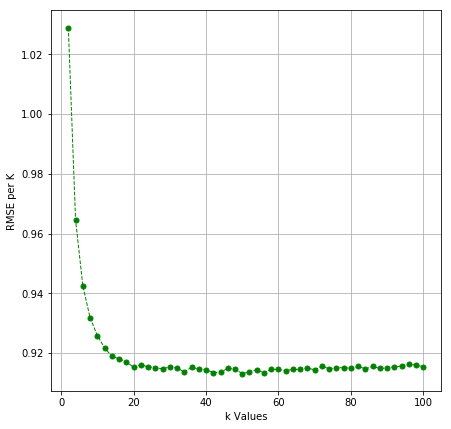

0.913135620844


In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

width = 1/1.5
plt.plot(kValue, Avg_RMSE, 'go--', linewidth=1, markersize=5)

plt.xlabel('k Values')
plt.ylabel('RMSE per K')
plt.grid('on')

plt.show()
print(min(Avg_RMSE))

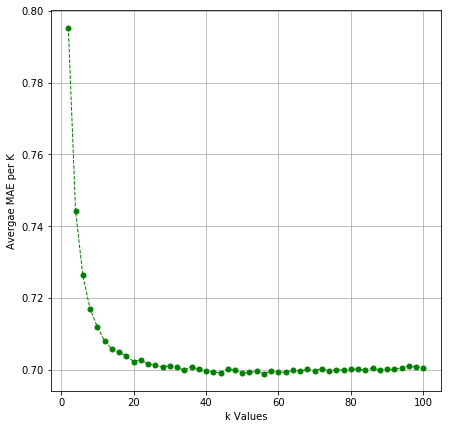

0.698955178663


In [31]:
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kValue, Avg_MAE, 'go--', linewidth=1, markersize=5)
plt.xlabel('k Values')
plt.ylabel('Avergae MAE per K')
plt.grid('on')

plt.show()
print(min(Avg_MAE))

In [11]:
from surprise.model_selection import KFold

In [16]:
df.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [14]:
kf = KFold(n_splits=10)

In [19]:
algo = KNNWithMeans()


for trainset, testset in kf.split(data):
    print("Anupam")
    



Anupam
Anupam
Anupam
Anupam
Anupam
Anupam
Anupam
Anupam
Anupam
Anupam


In [35]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [30]:
df_movie = df.set_index(['movieId'])
df_movie.head()

,userId,rating,timestamp
movieId,,,
31,1,2.5,1260759144
1029,1,3.0,1260759179
1061,1,3.0,1260759182
1129,1,2.0,1260759185
1172,1,4.0,1260759205


In [126]:
df_movie.head()

,userId,rating,timestamp,bin_rating
movieId,,,,
31,1,2.5,1260759144,0
1029,1,3.0,1260759179,1
1061,1,3.0,1260759182,1
1129,1,2.0,1260759185,0
1172,1,4.0,1260759205,1


In [46]:
df_movie.iloc[:10]

,userId,rating,timestamp
movieId,,,
31,1,2.5,1260759144
1029,1,3.0,1260759179
1061,1,3.0,1260759182
1129,1,2.0,1260759185
1172,1,4.0,1260759205
1263,1,2.0,1260759151
1287,1,2.0,1260759187
1293,1,2.0,1260759148
1339,1,3.5,1260759125


In [55]:
df_movie_rating = df.set_index(['movieId','rating'])
df_movie_rating.head()

,,userId,timestamp
movieId,rating,,
31,2.5,1,1260759144
1029,3.0,1,1260759179
1061,3.0,1,1260759182
1129,2.0,1,1260759185
1172,4.0,1,1260759205


In [64]:
df_movie['rating']

movieId
31      2.5
1029    3.0
1061    3.0
1129    2.0
1172    4.0
1263    2.0
1287    2.0
1293    2.0
1339    3.5
1343    2.0
1371    2.5
1405    1.0
1953    4.0
2105    4.0
2150    3.0
2193    2.0
2294    2.0
2455    2.5
2968    1.0
3671    3.0
10      4.0
17      5.0
39      5.0
47      4.0
50      4.0
52      3.0
62      3.0
110     4.0
144     3.0
150     5.0
       ... 
4034    4.5
4306    5.0
4308    3.5
4880    4.0
4886    5.0
4896    5.0
4963    4.5
4973    4.5
4993    5.0
4995    4.0
5010    2.0
5218    2.0
5299    3.0
5349    4.0
5377    4.0
5445    4.5
5464    3.0
5669    4.0
5816    4.0
5902    3.5
5952    5.0
5989    4.0
5991    4.5
5995    4.0
6212    2.5
6268    2.5
6269    4.0
6365    4.0
6385    2.5
6565    3.5
Name: rating, Length: 100004, dtype: float64

In [55]:
test = df_movie.drop(df_movie[df_movie.rating <=2].index)
#test = df.drop(df[df.rating <=2].index)
print(test.head())

         userId  rating   timestamp
movieId                            
1953          1     4.0  1260759191
222           2     5.0   835355840
27369         3     3.5  1298862555
48783         3     4.5  1298862361
50068         3     4.5  1298862467


In [ ]:
movieVar = np.array(df_movie.var(axis=1))
print("Maximum Movie Varinance is :", max(movieVar))
print("Minimum Movie Varinance is :", min(movieVar))
movieVar = movieVar[~np.isnan(movieVar)]

In [32]:
def popular_movie(inputData):
          outputData= inputData.drop(inputData[inputData.rating <=2].index)
          return outputData


In [69]:
def unpopular_movie(inputData):
          outputData= inputData.drop(inputData[inputData.rating >2].index)
          return outputData


In [6]:
def unpopmovies(mydataset):
    unpopmovies_counter = Counter([count[1] for count in mydataset])
    unpopmovies_dataset = [count for count in mydataset if unpopmovies_counter[count[1]] < 2]
    return unpopmovies_dataset

In [65]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Load the movielens-100k dataset
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=10)
# We'll use the =KNN With Means algorithm.
Avg_RMSE_fold = []
Avg_RMSE_k = []
# Run 10-fold cross-validation and print results
for k in range(2,102,2):
    print("Attempt number:", k)
    algo = KNNWithMeans(k=k, verbose=False)
    for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset_df = pd.DataFrame(testset, columns=["userId","movieId","rating"])
            movieData = testset_df.set_index(['movieId'])
            popular_testset = popular_movie(movieData)
            popular_data = popular_testset.reset_index()
            testset_list = popular_data.values.tolist()
            predictions =algo.test(testset_list)
            # Compute and print Root Mean Squared Error
            rmse_fold_p = accuracy.rmse(predictions, verbose=False)
            Avg_RMSE_fold.append(rmse_fold_p)
            
    Avg_RMSE_k.append(np.mean(Avg_RMSE_fold))





Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50
Attempt number: 52
Attempt number: 54
Attempt number: 56
Attempt number: 58
Attempt number: 60
Attempt number: 62
Attempt number: 64
Attempt number: 66
Attempt number: 68
Attempt number: 70
Attempt number: 72
Attempt number: 74
Attempt number: 76
Attempt number: 78
Attempt number: 80
Attempt number: 82
Attempt number: 84
Attempt number: 86
Attempt number: 88
Attempt number: 90
Attempt number: 92
Attempt number: 94
Attempt number: 96
Attempt number: 98
Attempt number: 100


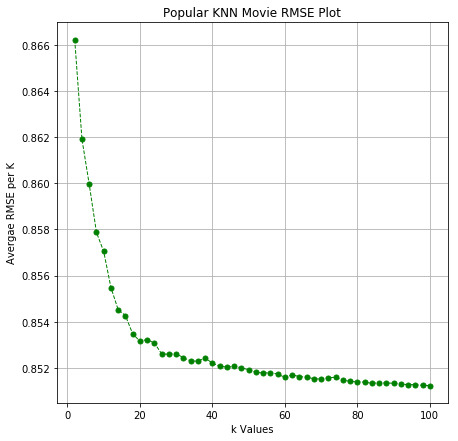

0.851228061778


In [66]:
kvalue =np.arange(2,102,2)
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kvalue, Avg_RMSE_k, 'go--', linewidth=1, markersize=5)
plt.xlabel('k Values')
plt.ylabel('Avergae RMSE per K')
plt.title("Popular KNN Movie RMSE Plot")
plt.grid('on')
plt.show()
print(min(Avg_RMSE_k))
   # rmse_mean =  cv['test_rmse'].mean()
    #mae_mean = cv['test_mae'].mean()
    #Avg_RMSE.append(rmse_mean) 
    #Avg_MAE.append(mae_mean)
    

In [11]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold
from collections import Counter

import numpy as np
import pandas as pd

#read file

# Load the movielens-100k dataset
#read file
rankings = pd.read_csv('ratings.csv')
df = pd.DataFrame(rankings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=10)
# We'll use the =KNN With Means algorithm.
Avg_RMSE_fold_u = []
Avg_RMSE_k_u = []
rmse_fold_u = []
# Run 10-fold cross-validation and print results
for k in range(2,102,2):
    print("Attempt number:", k)
    algo = KNNWithMeans(k=k, verbose=False)
    for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset_df = pd.DataFrame(testset, columns=["userId","movieId","rating"])
            #movieData = testset_df.set_index(['movieId'])
            #unpopular_testset = unpopular_movie(movieData)
            unpopular_testset = unpopmovies(testset)
            #unpopular_data = unpopular_testset.reset_index()
            #testset_list = unpopular_data.values.tolist()
            predictions =algo.test(unpopular_testset)
            #predictions =algo.test(testset_list)
            # Compute and print Root Mean Squared Error
            rmse_fold_u = accuracy.rmse(predictions, verbose=False)
            Avg_RMSE_fold_u.append(rmse_fold_u)
            
    Avg_RMSE_k_u.append(np.mean(Avg_RMSE_fold_u))


Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50
Attempt number: 52
Attempt number: 54
Attempt number: 56
Attempt number: 58
Attempt number: 60
Attempt number: 62
Attempt number: 64
Attempt number: 66
Attempt number: 68
Attempt number: 70
Attempt number: 72
Attempt number: 74
Attempt number: 76
Attempt number: 78
Attempt number: 80
Attempt number: 82
Attempt number: 84
Attempt number: 86
Attempt number: 88
Attempt number: 90
Attempt number: 92
Attempt number: 94
Attempt number: 96
Attempt number: 98
Attempt number: 100


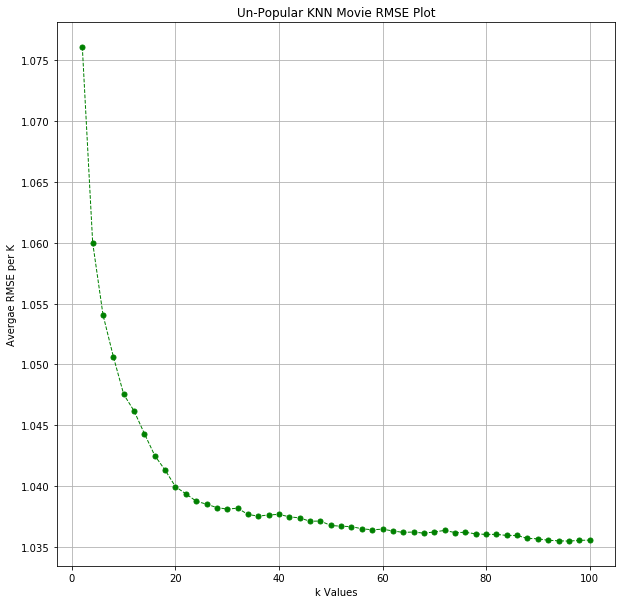

1.03547769145


In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
kvalue =np.arange(2,102,2)
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(kvalue, Avg_RMSE_k_u, 'go--', linewidth=1, markersize=5)
plt.xlabel('k Values')
plt.ylabel('Avergae RMSE per K')
plt.title("Un-Popular KNN Movie RMSE Plot")
plt.grid('on')
plt.show()
print(min(Avg_RMSE_k_u))
   # rmse_mean =  cv['test_rmse'].mean()
    #mae_mean = cv['test_mae'].mean()
    #Avg_RMSE.append(rmse_mean) 
    #Avg_MAE.append(mae_mean)
    

In [55]:
from collections import Counter
from collections import defaultdict

def highvar(mydataset):
    #print(mydataset)
    movielist = defaultdict(list)
    #print(movielist)
    for count in mydataset:
        movielist[count[1]].append(count[2])
    
    highvar_movies = [count for count in mydataset if len(movielist[count[1]]) >= 5 and np.var(movielist[count[1]]) >= 2.0]
    #print(movielist)
    #print(highvar_movies)
    return highvar_movies


In [56]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Load the movielens-100k dataset
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=10)
# We'll use the =KNN With Means algorithm.
Avg_RMSE_fold_v = []
Avg_RMSE_k_v = []
# Run 10-fold cross-validation and print results
for k in range(2,102,2):
    print("Attempt number:", k)
    algo = KNNWithMeans(k=k, verbose=False)
    for trainset, testset in kf.split(data):
            algo.fit(trainset)
            #testset_df = pd.DataFrame(testset, columns=["userId","movieId","rating"])
            #movieData = testset_df.set_index(['movieId'])
            var_testset = highvar(testset)
            #var_data = var_testset.reset_index()
            #var_testset_list = var_data.values.tolist()
            predictions =algo.test(var_testset)
            # Compute and print Root Mean Squared Error
            rmse_fold_v = accuracy.rmse(predictions, verbose=False)
            Avg_RMSE_fold_v.append(rmse_fold_v)
            
    Avg_RMSE_k_v.append(np.mean(Avg_RMSE_fold_v))

Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50
Attempt number: 52
Attempt number: 54
Attempt number: 56
Attempt number: 58
Attempt number: 60
Attempt number: 62
Attempt number: 64
Attempt number: 66
Attempt number: 68
Attempt number: 70
Attempt number: 72
Attempt number: 74
Attempt number: 76
Attempt number: 78
Attempt number: 80
Attempt number: 82
Attempt number: 84
Attempt number: 86
Attempt number: 88
Attempt number: 90
Attempt number: 92
Attempt number: 94
Attempt number: 96
Attempt number: 98
Attempt number: 100


In [10]:
kvalue =np.arange(2,102,2)
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kvalue, Avg_RMSE_k_v, 'go--', linewidth=1, markersize=5)
plt.xlabel('k Values')
plt.ylabel('Avergae RMSE per K')
plt.title("High Variance KNN Movie RMSE Plot")
plt.grid('on')
plt.show()

print(min(Avg_RMSE_k_v))
   # rmse_mean =  cv['test_rmse'].mean()
    #mae_mean = cv['test_mae'].mean()
    #Avg_RMSE.append(rmse_mean) 
    #Avg_MAE.append(mae_mean)
    

NameError: name 'plt' is not defined

### Question 15: Plot the ROC curve for various thresholds and report the AUC.

In [67]:
def bin_rating(row):
    if row['rating']>2.5:
        return 1
    else:
        return 0

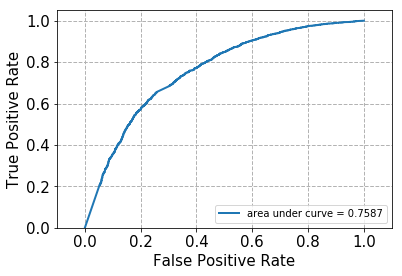

In [68]:
from sklearn import metrics
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import numpy as np
import pandas as pd
from surprise import KNNWithMeans
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from matplotlib import pyplot as plt
%matplotlib inline




def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    



rankings = pd.read_csv('ratings.csv')
df = pd.DataFrame(rankings)
df_movie = df.set_index(['movieId'])
df_movie['rating'] = df_movie.apply(bin_rating,axis=1)
df_m= df_movie.reset_index()

reader = Reader(rating_scale=(0, 1))
data_15= Dataset.load_from_df(df_m[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data_15, test_size=.10)
algo = KNNWithMeans(k=16, verbose=False)
algo.fit(trainset)
predictions = algo.test(testset)

pred = pd.DataFrame(predictions)
fpr, tpr, thresholds = metrics.roc_curve(pred['r_ui'], pred['est'])

#print(predictions.r_ui)

plot_roc(fpr,tpr) 


In [9]:
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader

In [7]:
df = pd.DataFrame(rankings)
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [11]:
# We'll use the =KNN With Means algorithm.
Avg_RMSE = []
Avg_MAE = []
# Run 10-fold cross-validation and print results
for k in range(2,52,2):
    print("Attempt number:", k)
    algo = NMF(n_factors=k, verbose=False)
    cv = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse_mean =  cv['test_rmse'].mean()
    mae_mean = cv['test_mae'].mean()
    Avg_RMSE.append(rmse_mean) 
    Avg_MAE.append(mae_mean)

Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50


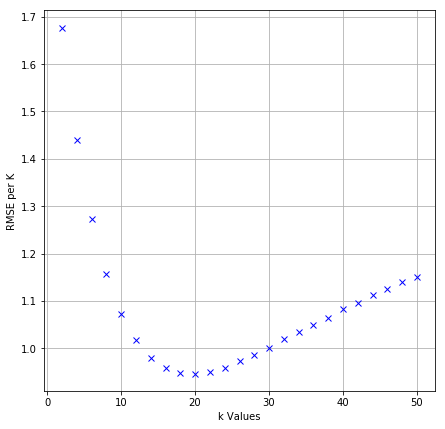

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

kValue = np.arange(2,52,2)

plt.figure(figsize=(7,7))

width = 1/1.5
plt.plot(kValue, Avg_RMSE,'bx')

plt.xlabel('k Values')
plt.ylabel('RMSE per K')
plt.grid('on')

plt.show()

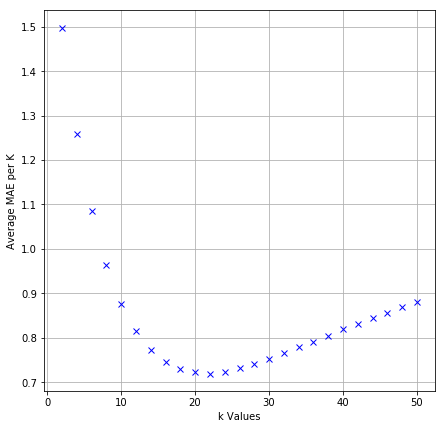

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

kValue = np.arange(2,52,2)

plt.figure(figsize=(7,7))

width = 1/1.5
plt.plot(kValue, Avg_MAE,'bx')

plt.xlabel('k Values')
plt.ylabel('Average MAE per K')
plt.grid('on')

plt.show()

In [15]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Load the movielens-100k dataset
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=10)
# We'll use the =KNN With Means algorithm.
Avg_RMSE_fold_NMF = []
Avg_RMSE_k_NMF = []
# Run 10-fold cross-validation and print results
for k in range(2,52,2):
    print("Attempt number:", k)
    algo = NMF(n_factors=k, verbose=False)
    for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset_df = pd.DataFrame(testset, columns=["userId","movieId","rating"])
            movieData = testset_df.set_index(['movieId'])
            popular_testset = popular_movie(movieData)
            popular_data = popular_testset.reset_index()
            testset_list = popular_data.values.tolist()
            predictions =algo.test(testset_list)
            # Compute and print Root Mean Squared Error
            rmse_fold = accuracy.rmse(predictions, verbose=False)
            Avg_RMSE_fold_NMF.append(rmse_fold)
            
    Avg_RMSE_k_NMF.append(np.mean(Avg_RMSE_fold_NMF))


Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50


C:\Users\anupams\AppData\Local\Continuum\miniconda3\envs\myenv\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


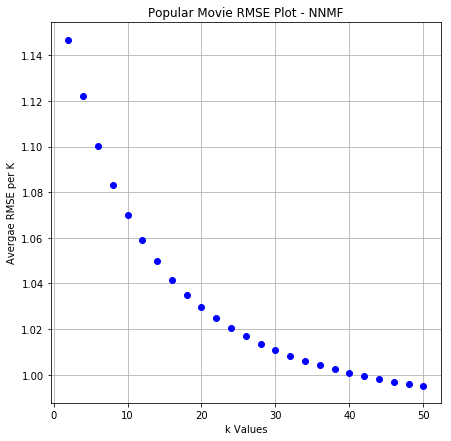

In [18]:
kvalue =np.arange(2,52,2)
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kvalue, Avg_RMSE_k_NMF, 'bo')
plt.xlabel('k Values')
plt.ylabel('Avergae RMSE per K')
plt.title("Popular Movie RMSE Plot - NNMF")
plt.grid('on')
plt.show()
   # rmse_mean =  cv['test_rmse'].mean()
    #mae_mean = cv['test_mae'].mean()
    #Avg_RMSE.append(rmse_mean) 
    #Avg_MAE.append(mae_mean)

In [19]:
print(min(Avg_RMSE_k_NMF))

0.9953072418831346


In [21]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Load the movielens-100k dataset
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=10)
# We'll use the =KNN With Means algorithm.
Avg_RMSE_fold_NMF_u = []
Avg_RMSE_k_NMF_u = []
# Run 10-fold cross-validation and print results
for k in range(2,52,2):
    print("Attempt number:", k)
    algo = NMF(n_factors=k, verbose=False)
    for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset_df = pd.DataFrame(testset, columns=["userId","movieId","rating"])
            movieData = testset_df.set_index(['movieId'])
            unpopular_testset = unpopular_movie(movieData)
            unpopular_data = unpopular_testset.reset_index()
            testset_list_u = unpopular_data.values.tolist()
            predictions_u =algo.test(testset_list_u)
            # Compute and print Root Mean Squared Error
            rmse_fold_u = accuracy.rmse(predictions_u, verbose=False)
            Avg_RMSE_fold_NMF_u.append(rmse_fold_u)
            
    Avg_RMSE_k_NMF_u.append(np.mean(Avg_RMSE_fold_NMF_u))

Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50


In [18]:
kvalue =np.arange(2,52,2)
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kvalue, Avg_RMSE_k_NMF_u, 'bo')
plt.xlabel('k Values')
plt.ylabel('Avergae RMSE per K')
plt.title("Popular Movie RMSE Plot - NNMF")
plt.grid('on')
plt.show()
   # rmse_mean =  cv['test_rmse'].mean()
    #mae_mean = cv['test_mae'].mean()
    #Avg_RMSE.append(rmse_mean) 
    #Avg_MAE.append(mae_mean)

NameError: name 'Avg_RMSE_k_NMF_u' is not defined

In [2]:
def bin_rating(row):
    if row['rating']>2.5:
        return 1
    else:
        return 0

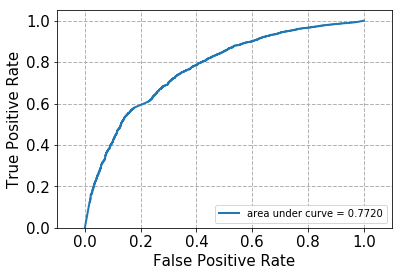

In [3]:
from sklearn import metrics
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import numpy as np
import pandas as pd
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from matplotlib import pyplot as plt
%matplotlib inline




def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    



rankings = pd.read_csv('ratings.csv')
df = pd.DataFrame(rankings)
df_movie = df.set_index(['movieId'])
df_movie['rating'] = df_movie.apply(bin_rating,axis=1)
df_m= df_movie.reset_index()

reader = Reader(rating_scale=(0, 1))
data_15= Dataset.load_from_df(df_m[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data_15, test_size=.10)
algo = NMF(n_factors=20, verbose=False)
algo.fit(trainset)
predictions = algo.test(testset)

pred = pd.DataFrame(predictions)
fpr, tpr, thresholds = metrics.roc_curve(pred['r_ui'], pred['est'])

#print(predictions.r_ui)

plot_roc(fpr,tpr) 


In [4]:
print(algo.pu)

[[ 0.43578679  0.22018079  0.50600623 ...,  0.32032554  0.46331703
   0.30304783]
 [ 0.38697688  0.36299609  0.09000872 ...,  0.38929825  0.32943954
   0.4327547 ]
 [ 0.08822655  0.33327477  0.2983084  ...,  0.40418318  0.30066045
   0.38945807]
 ..., 
 [ 0.32363871  0.15467068  0.32411243 ...,  0.3079439   0.29967848
   0.07219417]
 [ 0.35571366  0.27763715  0.3868829  ...,  0.34968336  0.35324906
   0.37382886]
 [ 0.57459173  0.46362218  0.19579681 ...,  0.25969774  0.43051979
   0.33092075]]


In [5]:
print(type(algo.pu))

<class 'numpy.ndarray'>


In [6]:
print(algo.qi.shape)

(8750, 20)


In [7]:
itemV = algo.qi

In [8]:
print(itemV)

[[ 0.36763651  0.35309827  0.36523679 ...,  0.24639699  0.4070088
   0.28562305]
 [ 0.37670746  0.34448139  0.09631092 ...,  0.34154177  0.36447726
   0.30629283]
 [ 0.30656835  0.15257806  0.01547111 ...,  0.60066066  0.23453847
   0.3776858 ]
 ..., 
 [ 0.37624367  0.41267222  0.23867782 ...,  0.11844398  0.44886478
   0.34594266]
 [ 0.24377436  0.48679038  0.28885667 ...,  0.26443297  0.32779449
   0.42493454]
 [ 0.22919293  0.21425159  0.02849327 ...,  0.11354923  0.04594485
   0.00931733]]


In [9]:
print(pd.DataFrame(itemV).head())pri

SyntaxError: invalid syntax (<ipython-input-9-8f8dfc1091a6>, line 1)

In [10]:
print(itemV[:,0].argsort()[-10:][::-1])

[ 756 3245 2605 7094 6448 6850 2155 4115 2730 3196]


In [65]:
print(itemV[:,0].argsort())

[5809 5293 7559 ..., 5245 6901 4904]


In [62]:
print(ind)

[4904 6901 5245 5859 2211 7740 5232 4078 4489 4354]


In [42]:
dataf = pd.DataFrame(ind)

In [43]:
dataf.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.959384,0.190223,0.043771,0.237963,0.008741,0.061393,0.326135,0.159446,0.048645,0.192341,0.406326,0.134357,0.017979,0.305852,0.895700,0.348180,0.387347,0.009953,0.021200,0.210802
1,0.952792,0.052992,0.008029,0.266270,0.079928,0.504490,0.461084,0.561001,0.291026,0.233680,0.360503,0.211917,0.096493,0.564392,0.225493,0.269061,0.076412,0.035136,0.432758,0.002124
2,0.923932,0.351268,0.120489,0.715249,0.030032,0.112409,0.451018,0.408110,0.207695,0.030523,0.306867,0.272340,0.073023,0.162626,0.280370,0.444564,0.286215,0.321553,0.225854,0.095584
3,0.859671,0.387013,0.035474,0.174892,0.408760,0.266196,0.295294,0.671826,0.235138,0.241563,0.174180,0.374478,0.222670,0.289087,0.208829,0.145914,0.152327,0.100611,0.212247,0.274886
4,0.849691,0.326126,0.666272,0.025096,0.096481,0.033040,0.100278,0.060425,0.338879,0.005773,0.102083,0.641752,0.384721,0.327192,0.031810,0.000037,0.047139,0.340988,0.001426,0.307335


In [45]:
print(dir(algo))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'bi', 'biased', 'bsl_options', 'bu', 'compute_baselines', 'compute_similarities', 'default_prediction', 'estimate', 'fit', 'get_neighbors', 'init_high', 'init_low', 'lr_bi', 'lr_bu', 'n_epochs', 'n_factors', 'predict', 'pu', 'qi', 'random_state', 'reg_bi', 'reg_bu', 'reg_pu', 'reg_qi', 'sgd', 'sim_options', 'skip_train', 'test', 'train', 'trainset', 'verbose']


In [46]:
print(algo.lr_bi)

0.005


In [50]:
print(ind.shape[1])

20


In [11]:
for mov in range(itemV.shape[1]):
    print('Value', mov)
    mov_name = itemV[:,mov]
    print(mov_name)
    column_sort = mov_name.argsort()[-10:][::-1]
    print(column_sort)

Value 0
[ 0.36763651  0.37670746  0.30656835 ...,  0.37624367  0.24377436
  0.22919293]
[ 756 3245 2605 7094 6448 6850 2155 4115 2730 3196]
Value 1
[ 0.35309827  0.34448139  0.15257806 ...,  0.41267222  0.48679038
  0.21425159]
[2305 7754 4665 2913 4084 1941 2264 4316  274 4835]
Value 2
[ 0.36523679  0.09631092  0.01547111 ...,  0.23867782  0.28885667
  0.02849327]
[2475 4147 1506 7078 1385 6725  318 4426 5275 1554]
Value 3
[ 0.3444576   0.36588121  0.11674175 ...,  0.3303212   0.06261611
  0.22789451]
[6696 4080 6404  919 6204 4396 6211  813 4495 3541]
Value 4
[ 0.17710393  0.25540578  0.35349386 ...,  0.2992484   0.15357944
  0.14700409]
[5837 5532 4645 5777 6006 7162 5316  650 3462 6184]
Value 5
[ 0.37939761  0.32090748  0.42983862 ...,  0.35009863  0.34445654
  0.1650249 ]
[1915 5561 1623 4820 4043 2503 4626  203 5130  651]
Value 6
[ 0.36840808  0.39581324  0.3042645  ...,  0.14568732  0.11497455
  0.10399444]
[4453 5142 5372 3712 3390 6733 5000 5647 5782 2051]
Value 7
[ 0.3617243 

In [15]:
movies = pd.read_csv('movies.csv')

0           Adventure|Animation|Children|Comedy|Fantasy
1                            Adventure|Children|Fantasy
2                                        Comedy|Romance
3                                  Comedy|Drama|Romance
4                                                Comedy
5                                 Action|Crime|Thriller
6                                        Comedy|Romance
7                                    Adventure|Children
8                                                Action
9                             Action|Adventure|Thriller
10                                 Comedy|Drama|Romance
11                                        Comedy|Horror
12                         Adventure|Animation|Children
13                                                Drama
14                             Action|Adventure|Romance
15                                          Crime|Drama
16                                        Drama|Romance
17                                              

In [16]:
print(itemV[:,0].argsort()[-10:][::-1])

[ 756 3245 2605 7094 6448 6850 2155 4115 2730 3196]


In [26]:
print(movies.genres[3196])

Drama|Romance|War


In [47]:
from sklearn import metrics
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import numpy as np
import pandas as pd
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from matplotlib import pyplot as plt
%matplotlib inline

rankings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
df = pd.DataFrame(rankings)
#df_movie = df.set_index(['movieId'])
#df_movie['rating'] = df_movie.apply(bin_rating,axis=1)
#df_m= df_movie.reset_index()

reader = Reader(rating_scale=(1, 5))
data_15= Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data_15, test_size=.01)
algo = NMF(n_factors=20, verbose=False)
algo.fit(trainset)

u = algo.pu
v = algo.qi


This is for column: 0
['Documentary', 'Drama', 'Drama|Romance', 'Drama|Thriller', 'Drama|Fantasy|Horror|Thriller|War', 'Comedy|Drama|War', 'Comedy|Drama', 'Comedy|Drama|Romance', 'Adventure|Animation|Children|Musical|Western', 'Drama|Thriller']


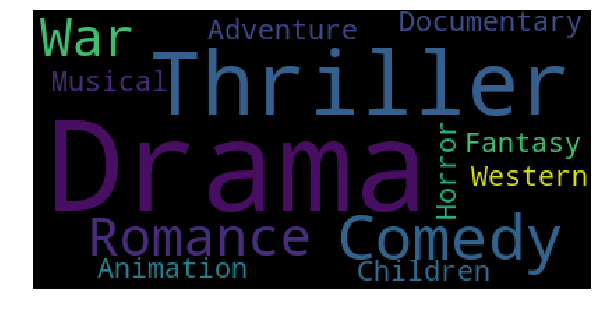

This is for column: 1
['Action|Thriller', 'Adventure|Comedy', 'Action|Comedy|Crime|Thriller', 'Adventure|Children|Comedy|Fantasy|Mystery', 'Drama|Horror', 'Comedy|Drama|Musical', 'Drama', 'Adventure|Drama', 'Comedy', 'Drama|Romance']


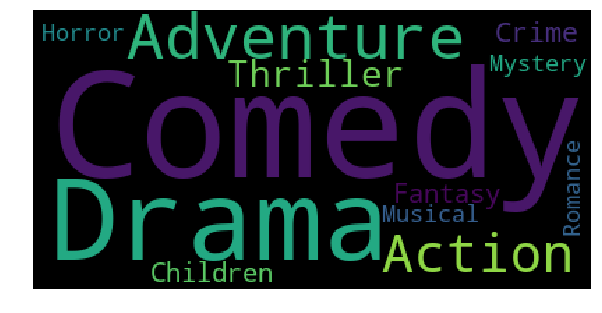

This is for column: 2
['Comedy|Drama|Romance', 'Comedy|Thriller', 'Drama|Romance', 'Musical|Romance', 'Drama|Mystery', 'Horror|Sci-Fi|Thriller', 'Comedy', 'Comedy|Horror|Thriller', 'Drama', 'Drama']


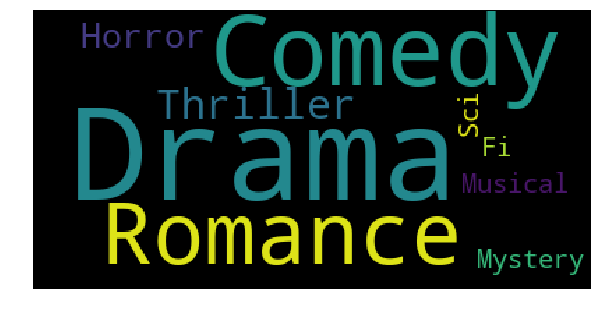

This is for column: 3
['Comedy', 'Drama', 'Comedy|Horror|Thriller', 'Comedy|Drama|Romance', 'Drama', 'Comedy', 'Comedy|Thriller', 'Comedy', 'Action|War', 'Comedy|Musical|Romance']


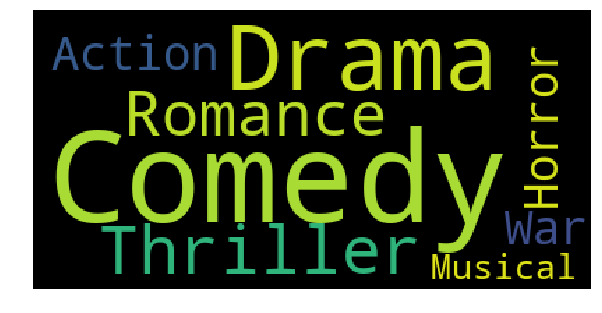

This is for column: 4
['Comedy', 'Action|Adventure|Animation', 'Animation|Children|Musical', 'Documentary', 'Drama', 'Sci-Fi', 'Horror', 'Crime|Horror|Thriller', 'Drama', 'Comedy']


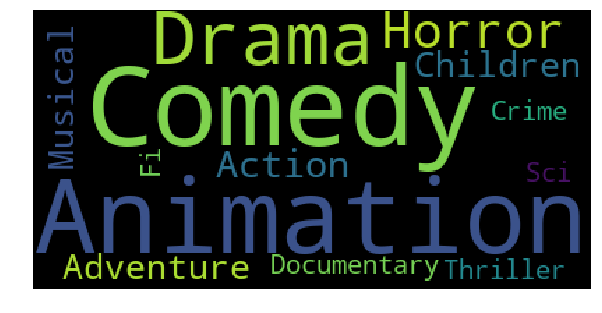

This is for column: 5
['Comedy|Drama', 'Animation|Comedy|Fantasy|Musical', 'Action|Horror|Sci-Fi|Thriller', 'Mystery|Romance|Sci-Fi|Thriller', 'Comedy|Drama|Romance', 'Crime|Drama', 'Drama', 'Comedy|Drama|Musical|Romance', 'Drama', 'Adventure|Animation|Children|Comedy']


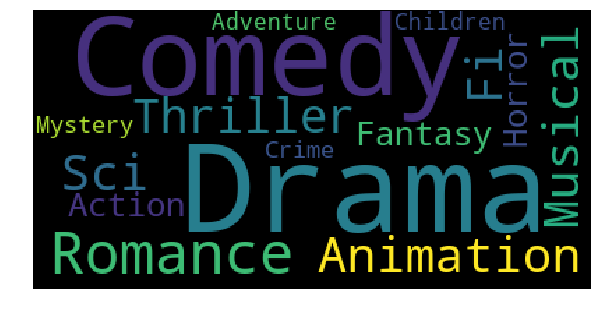

This is for column: 6
['Drama', 'Action|Adventure|Sci-Fi', 'Action|Comedy', 'Comedy|Musical|Western', 'Drama|Musical', 'Adventure|Drama', 'Action|Adventure|Fantasy', 'Animation|Comedy|Drama', 'Adventure|Comedy|Drama|Fantasy|Romance', 'Action|Sci-Fi|Thriller']


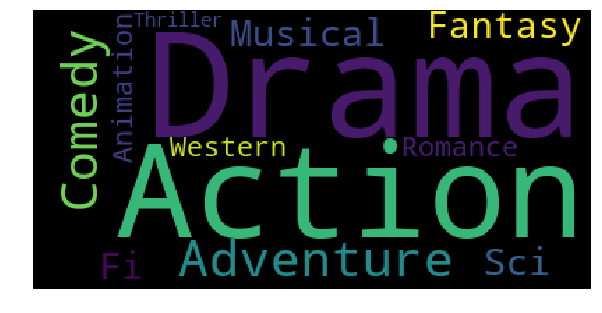

This is for column: 7
['Adventure|Children|Fantasy', 'Crime|Drama', 'Drama', 'Drama|Romance', 'Comedy|Drama|Romance', 'Drama', 'Comedy|Drama', 'Animation|Comedy', 'Documentary', 'Comedy']


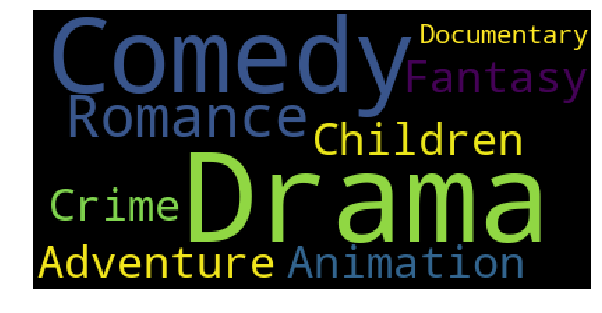

This is for column: 8
['Comedy|Crime|Drama', 'Documentary', 'Drama', 'Comedy|Romance', 'Action|Crime|Drama|Thriller', 'Adventure', 'Adventure|Animation|Children|Comedy', 'Action|Adventure|Comedy', 'Comedy|Drama|Romance', 'Drama|Romance']


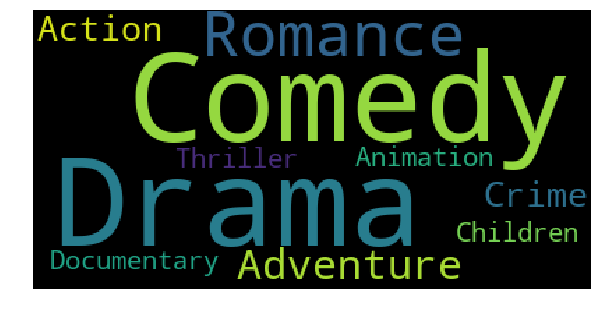

This is for column: 9
['Horror', 'Action|Drama|War', 'Comedy', 'Action|Adventure|Horror', 'Animation|Children', 'Horror', 'Sci-Fi|Thriller', 'Crime|Drama|Film-Noir|Romance', 'Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi|IMAX', 'Adventure|Comedy']


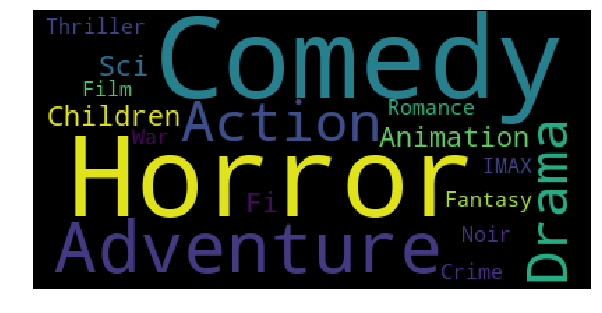

This is for column: 10
['Drama', 'Action|Adventure|Drama|Sci-Fi|Thriller', 'Comedy|Romance', 'Drama|Romance', 'Drama', 'Drama|Romance', 'Children|Comedy', 'Comedy', 'Drama', 'Drama']


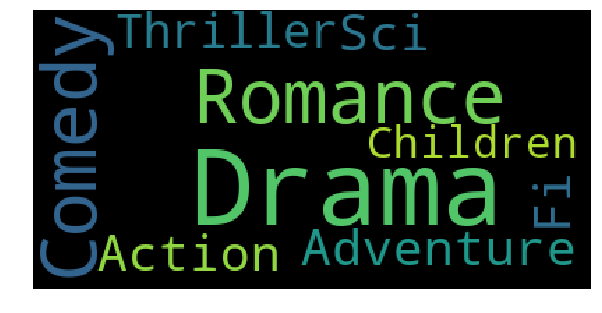

This is for column: 11
['Comedy|Drama|War', 'Crime|Drama', 'Comedy|Musical', 'Comedy', 'Action|Sci-Fi', 'Comedy|Musical|Romance', 'Crime|Drama', 'Adventure|Drama|Romance', 'Crime|Drama|Film-Noir|Thriller', 'Comedy|Drama|Romance']


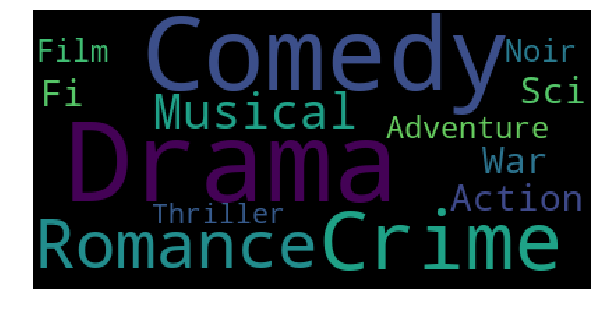

This is for column: 12
['Animation|Comedy|Fantasy', 'Comedy|Romance', 'Crime|Drama|Romance|Thriller', 'Comedy|Romance', 'Action|Horror|Thriller', 'Comedy|Drama|Romance|Thriller', 'Comedy', 'Horror|Thriller', 'Children|Comedy', 'Crime|Drama|Thriller']


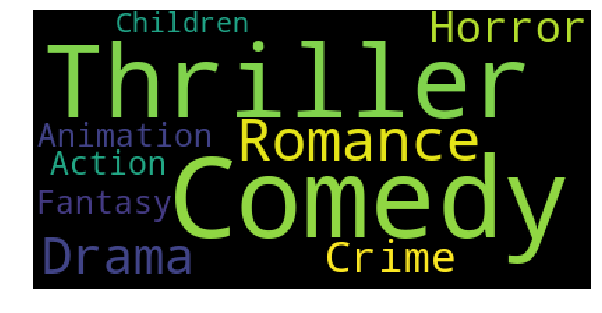

This is for column: 13
['Adventure|Children|Comedy|Fantasy|Mystery', 'Action|Comedy|Romance|Thriller', 'Adventure|Drama', 'Crime|Drama', 'Comedy|Romance', 'Children|Comedy', 'Comedy|Horror', 'Action|Adventure|Fantasy|Sci-Fi', 'Comedy', 'Action']


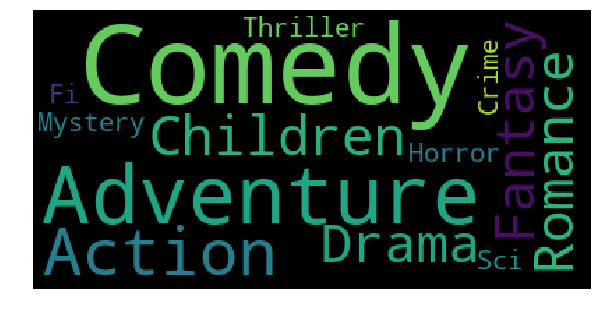

This is for column: 14
['Comedy|Drama|Sci-Fi|War', 'Comedy', 'Comedy', 'Western', 'Adventure|Drama|Sci-Fi', 'Comedy|Romance', 'Adventure|War', 'Animation|Children|Comedy', 'Drama', 'Drama|Romance|War']


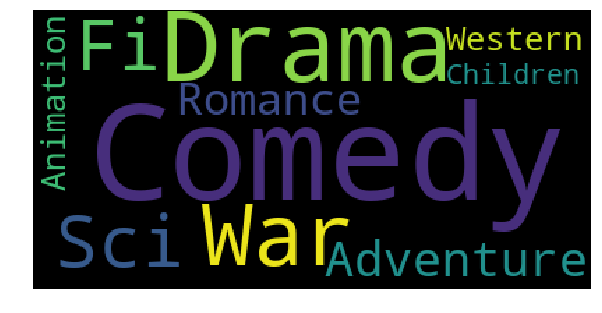

This is for column: 15
['Action|Adventure|Comedy|Crime', 'Comedy|Drama|Romance', 'Action|Adventure|Comedy|Crime', 'Crime|Drama', 'Drama|Horror|Thriller', 'Comedy|Musical|Romance', 'Action|Adventure|Thriller', 'Horror', 'Comedy|Drama', 'Adventure|Drama|Romance|Sci-Fi']


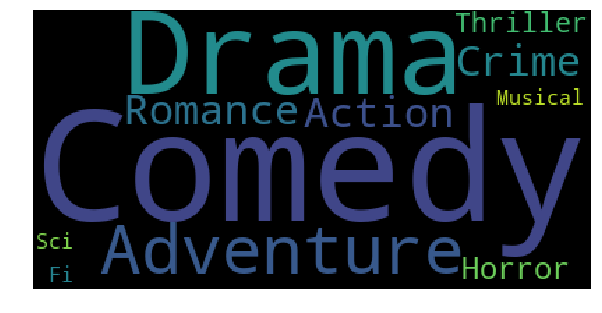

This is for column: 16
['Children|Comedy', 'Documentary', 'Adventure|War', 'Crime|Drama', 'Action|Adventure|Drama|Thriller', 'Drama', 'Comedy', 'Comedy', 'Documentary', 'Thriller']


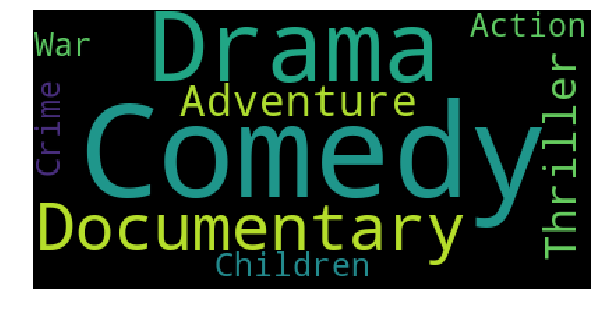

This is for column: 17
['Crime|Documentary', 'Drama|Thriller', 'Comedy', 'Drama|Romance', 'Thriller', 'Comedy', 'Action|Adventure|Drama|Thriller', 'Documentary', 'Drama', 'Drama']


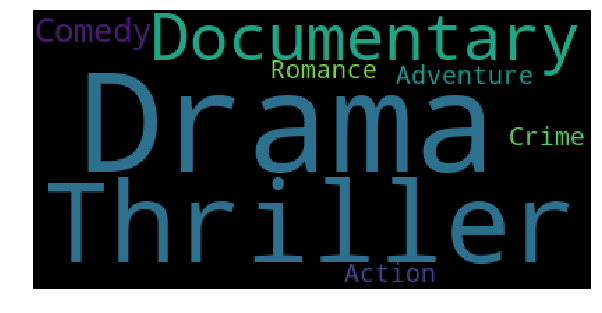

This is for column: 18
['Comedy|Drama', 'Action|Mystery|Thriller', 'Comedy|Crime|Drama|Thriller', 'Comedy|Musical|Romance', 'Drama|Romance', 'Horror', 'Drama', 'Action|Crime|Drama', 'Action|Adventure|Drama', 'Drama|Film-Noir']


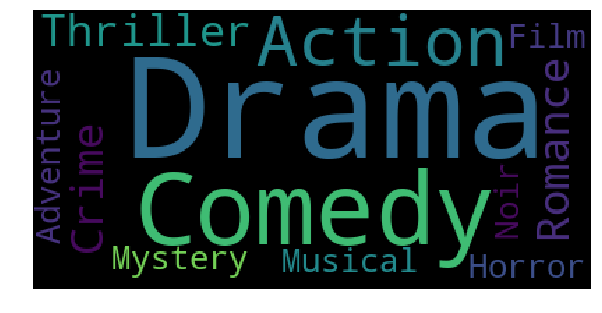

This is for column: 19
['Comedy', 'Adventure|Comedy', 'Comedy|Drama', 'Action|Adventure|Fantasy', 'Horror', 'Comedy|Drama', 'Adventure|Crime|Horror|Thriller', 'Drama', 'Comedy', 'Action|Drama']


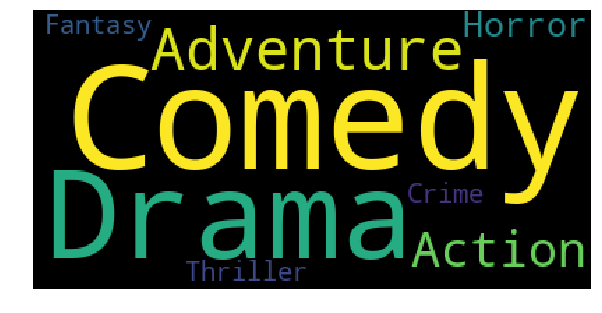

In [49]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
#%matplotlib inline
import re
for k in range(v.shape[1]):
    print("This is for column:", k)
    v_column = v[:,k]
    v_top10rowIndex = v_column.argsort()[-10:][::-1]
    m_top10Genre = [(movies.genres[i]) for i in v_top10rowIndex]
    print(m_top10Genre)
    
    letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(m_top10Genre))
    
    cloud = WordCloud(background_color='black').generate(letters_only)
    plt.figure(figsize=(10,10))
    #plt.tight_layout(pad=0)
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()
    
    

In [42]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader

In [43]:
df = pd.DataFrame(rankings)
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [44]:
Avg_RMSE_SVD = []
Avg_MAE_SVD = []
rmse_mean_svd= []
mae_mean_svd = []
# Run 10-fold cross-validation and print results
for k in range(2,52,2):
    print("Attempt number:", k)
    algo = SVD(n_factors=k, verbose=False)
    cv_svd = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse_mean_svd =  cv_svd['test_rmse'].mean()
    mae_mean_svd = cv_svd['test_mae'].mean()
    Avg_RMSE_SVD.append(rmse_mean_svd) 
    Avg_MAE_SVD.append(mae_mean_svd)
    

Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50


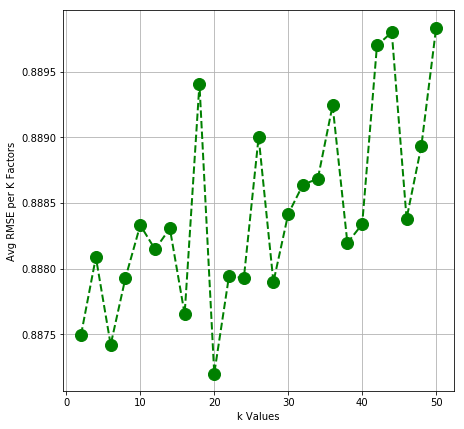

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt

kValue =np.arange(2,52,2)

plt.figure(figsize=(7,7))

width = 1/1.5
plt.plot(kValue, Avg_RMSE_SVD, 'go--', linewidth=2, markersize=12)

plt.xlabel('k Values')
plt.ylabel('Avg RMSE per K Factors')
plt.grid('on')

plt.show()

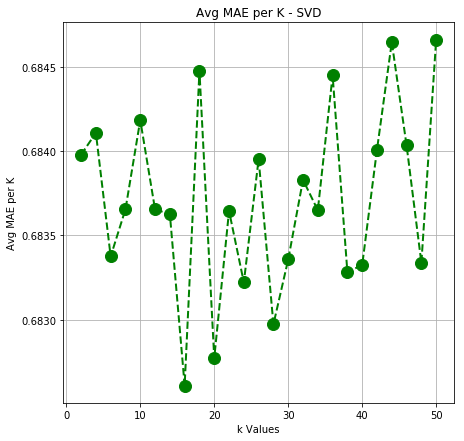

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt

kValue =np.arange(2,52,2)

plt.figure(figsize=(7,7))

width = 1/1.5
plt.plot(kValue, Avg_MAE_SVD, 'go--', linewidth=2, markersize=12)

plt.xlabel('k Values')
plt.ylabel('Avg MAE per K')
plt.title('Avg MAE per K - SVD')
plt.grid('on')

plt.show()

In [50]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Load the movielens-100k dataset
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=10)
# We'll use the =KNN With Means algorithm.
Avg_RMSE_fold_SVD = []
Avg_RMSE_k_SVD = []
# Run 10-fold cross-validation and print results
for k in range(2,52,2):
    print("Attempt number:", k)
    algo = SVD(n_factors=k, verbose=False)
    for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset_df = pd.DataFrame(testset, columns=["userId","movieId","rating"])
            movieData = testset_df.set_index(['movieId'])
            popular_testset = popular_movie(movieData)
            popular_data = popular_testset.reset_index()
            testset_list = popular_data.values.tolist()
            predictions =algo.test(testset_list)
            # Compute and print Root Mean Squared Error
            rmse_fold = accuracy.rmse(predictions, verbose=False)
            Avg_RMSE_fold_SVD.append(rmse_fold)
            
    Avg_RMSE_k_SVD.append(np.mean(Avg_RMSE_fold_SVD))


Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50


In [ ]:
kvalue =np.arange(2,52,2)
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kvalue, Avg_RMSE_k_SVD, 'go--', linewidth=2, markersize=12)
plt.xlabel('k Values')
plt.ylabel('Avergae RMSE per K')
plt.title("Popular Movie RMSE Plot - SVD")
plt.grid('on')
plt.show()
   # rmse_mean =  cv['test_rmse'].mean()
    #mae_mean = cv['test_mae'].mean()
    #Avg_RMSE.append(rmse_mean) 

In [54]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Load the movielens-100k dataset
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=10)
# We'll use the =KNN With Means algorithm.
Avg_RMSE_fold_SVD_u = []
Avg_RMSE_k_SVD_u = []
# Run 10-fold cross-validation and print results
for k in range(2,52,2):
    print("Attempt number:", k)
    algo = SVD(n_factors=k, verbose=False)
    for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset_df = pd.DataFrame(testset, columns=["userId","movieId","rating"])
            movieData = testset_df.set_index(['movieId'])
            unpopular_testset = unpopular_movie(movieData)
            unpopular_data = unpopular_testset.reset_index()
            testset_list = unpopular_data.values.tolist()
            predictions =algo.test(testset_list)
            # Compute and print Root Mean Squared Error
            rmse_fold = accuracy.rmse(predictions, verbose=False)
            Avg_RMSE_fold_SVD_u.append(rmse_fold)
            
    Avg_RMSE_k_SVD_u.append(np.mean(Avg_RMSE_fold_SVD_u))

Attempt number: 2
Attempt number: 4
Attempt number: 6
Attempt number: 8
Attempt number: 10
Attempt number: 12
Attempt number: 14
Attempt number: 16
Attempt number: 18
Attempt number: 20
Attempt number: 22
Attempt number: 24
Attempt number: 26
Attempt number: 28
Attempt number: 30
Attempt number: 32
Attempt number: 34
Attempt number: 36
Attempt number: 38
Attempt number: 40
Attempt number: 42
Attempt number: 44
Attempt number: 46
Attempt number: 48
Attempt number: 50


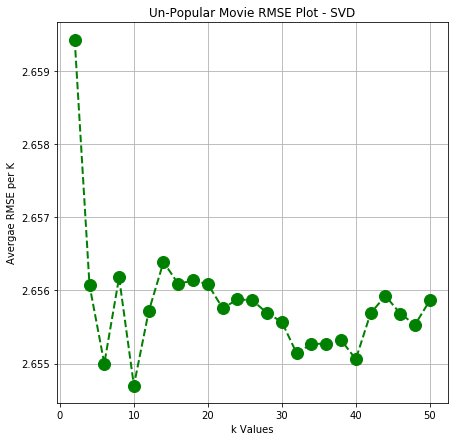

In [55]:
kvalue =np.arange(2,52,2)
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kvalue, Avg_RMSE_k_SVD_u, 'go--', linewidth=2, markersize=12)
plt.xlabel('k Values')
plt.ylabel('Avergae RMSE per K')
plt.title("Un-Popular Movie RMSE Plot - SVD")
plt.grid('on')
plt.show()
   # rmse_mean =  cv['test_rmse'].mean()
    #mae_mean = cv['test_mae'].mean()
    #Avg_RMSE.append(rmse_mean) 

In [63]:
def bin_rating(row):
    if row['rating']>4.0:
        return 1
    else:
        return 0

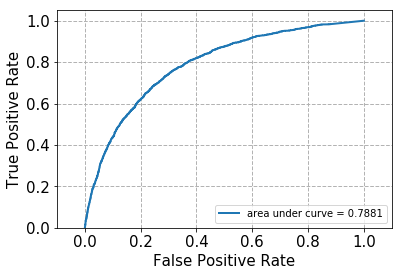

In [64]:
from sklearn import metrics
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import numpy as np
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from matplotlib import pyplot as plt
%matplotlib inline




def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    



rankings = pd.read_csv('ratings.csv')
df = pd.DataFrame(rankings)
df_movie = df.set_index(['movieId'])
df_movie['rating'] = df_movie.apply(bin_rating,axis=1)
df_m= df_movie.reset_index()

reader = Reader(rating_scale=(0, 1))
data_15= Dataset.load_from_df(df_m[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data_15, test_size=.10)
algo = SVD(n_factors=10, verbose=False)
algo.fit(trainset)
predictions = algo.test(testset)

pred = pd.DataFrame(predictions)
fpr, tpr, thresholds = metrics.roc_curve(pred['r_ui'], pred['est'])

#print(predictions.r_ui)

plot_roc(fpr,tpr) 


## Question 34 Onwards